***

# Homework 2 (Honors)

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.gridspec as gridspec

# Question 1.

**Data downloaded for the RMM index (an index for the MJO) from [here](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/index.html).**

In [19]:
column_names = ['year', 'month', 'day', 'RMM1', 'RMM2', 'phase', 'amplitude', 'method']

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/Stochastic1017/MATH_616/refs/heads/main/dataset/rmm.74toRealtime.txt",
                  delim_whitespace=True, names=column_names, comment='R', skiprows=2)

# Data engineering 
df.replace([1.E36, 999], np.nan, inplace=True)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop(columns=['year', 'month', 'day'], inplace=True)
df

,RMM1,RMM2,phase,amplitude,method,date
0,1.634470,1.203040,5.0,2.029480,WH04_method:_OL,1974-06-01
1,1.602890,1.015120,5.0,1.897290,WH04_method:_OL,1974-06-02
2,1.516250,1.085510,5.0,1.864760,WH04_method:_OL,1974-06-03
3,1.509810,1.035730,5.0,1.830920,WH04_method:_OL,1974-06-04
4,1.559060,1.305180,5.0,2.033260,WH04_method:_OL,1974-06-05
...,...,...,...,...,...,...
18161,-0.305918,0.305419,8.0,0.432281,Gottschalk10_method:_OL,2024-02-20
18162,0.103033,0.071931,5.0,0.125658,Gottschalk10_method:_OL,2024-02-21
18163,0.236122,0.248544,6.0,0.342823,Gottschalk10_method:_OL,2024-02-22
18164,0.201856,0.325106,6.0,0.382675,Gottschalk10_method:_OL,2024-02-23


# Question 2.

**Make plots similar to Figure 1 and Figure 12 from the Data-Driven SDE Paper (regardless of which paper you use in later tasks) (and ignore SSA curves in Figure 1 and ensemble predictions in Figure 12)**

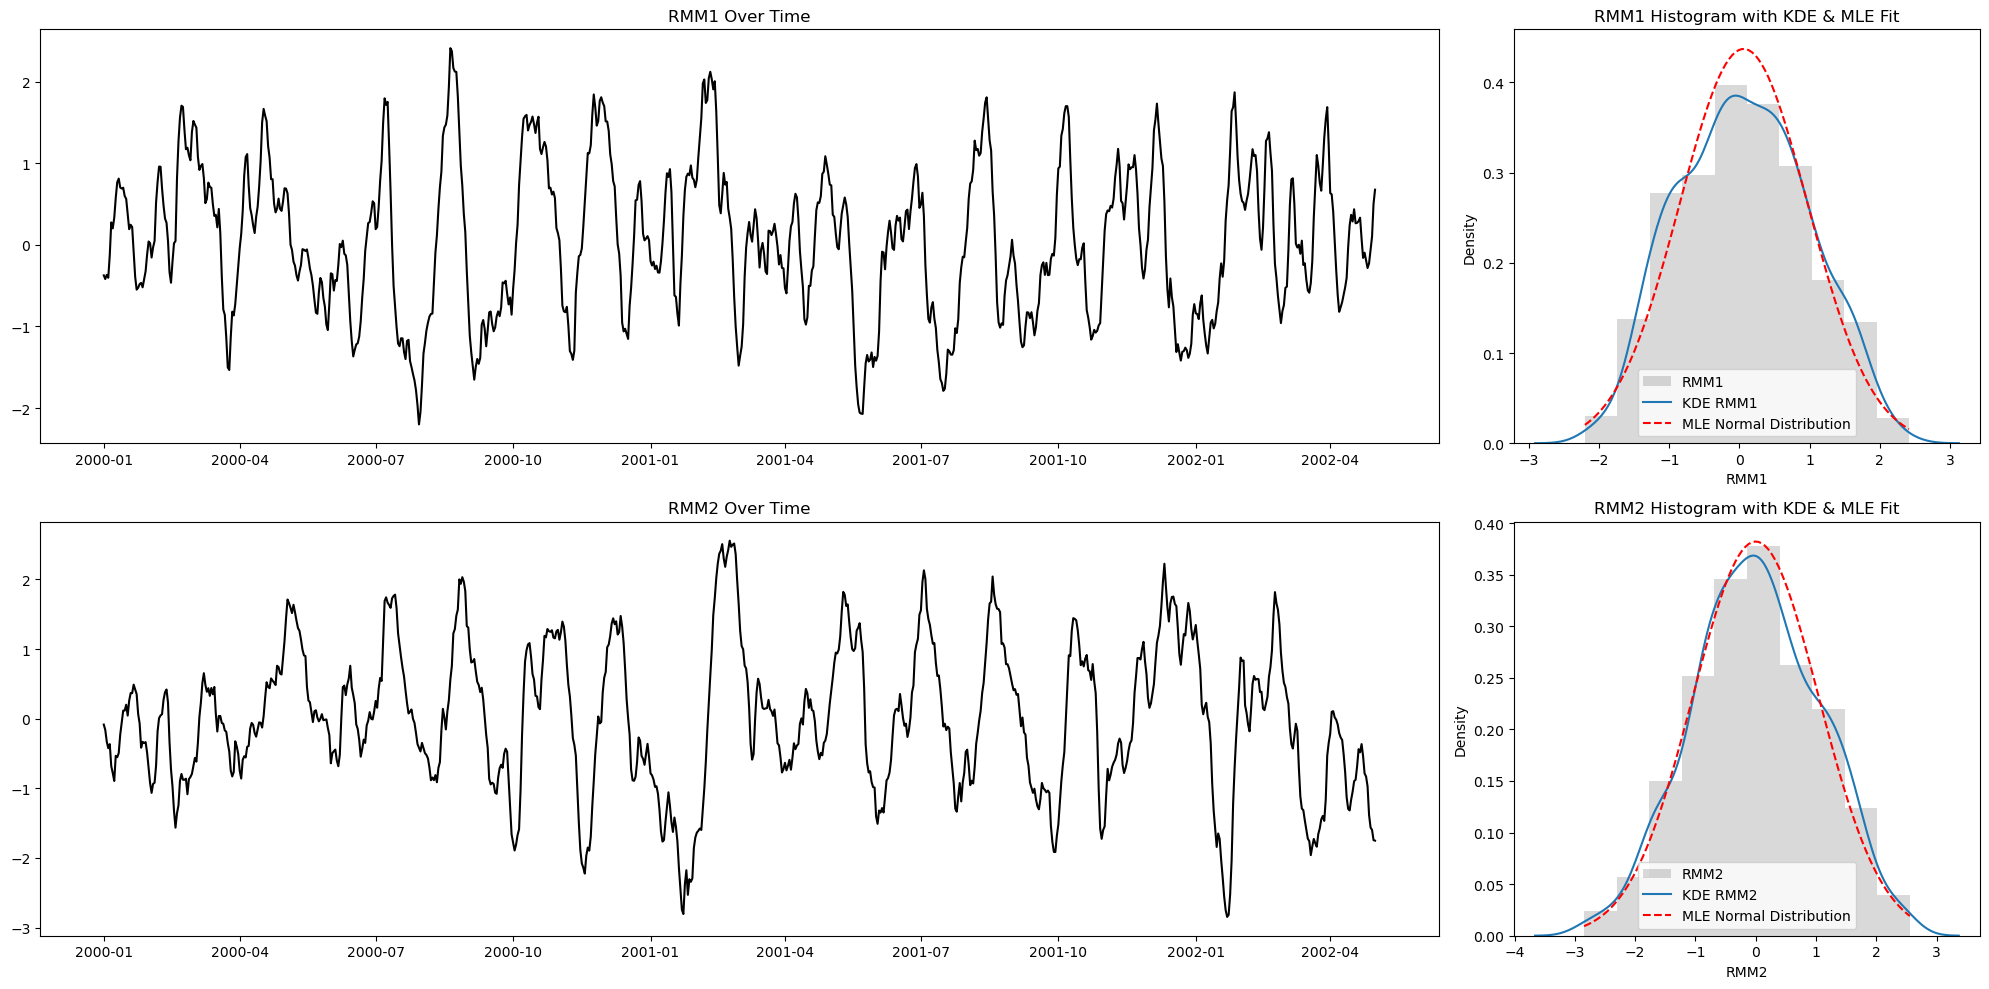

In [20]:
# Create a figure with a 2x2 grid of subplots, adjusting width ratios for columns
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1])

# Define axes for the 4 subplots in the grid layout
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column (line plot for RMM1)
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column (histogram/KDE for RMM1)

ax3 = fig.add_subplot(gs[1, 0])  # Second row, first column (line plot for RMM2)
ax4 = fig.add_subplot(gs[1, 1])  # Second row, second column (histogram/KDE for RMM2)

# Filter the data for the specific date range from 2000 to 2002
df_2000 = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2002-05-01')]

# --- Plot 1: Line plot of RMM1 over time ---
ax1.plot(df_2000['date'], df_2000['RMM1'], color='black', label='RMM1')  # Plot RMM1 over time
ax1.set_title('RMM1 Over Time')                                          # Set title for the plot

# --- Plot 2: Histogram with KDE and MLE Normal fit for RMM1 ---
ax2.hist(df_2000['RMM1'], density=True, alpha=0.15, color='black', label='RMM1')  # Histogram of RMM1
sns.kdeplot(data=df_2000, x="RMM1", ax=ax2, fill=False, label='KDE RMM1')         # Kernel Density Estimate for RMM1

# Calculate mean and standard deviation for RMM1
rmm1_mean, rmm1_std = np.mean(df_2000['RMM1']), np.std(df_2000['RMM1'])

# Generate x values for plotting the normal distribution (MLE)
x_rmm1 = np.linspace(min(df_2000['RMM1']), max(df_2000['RMM1']), 100)
pdf_rmm1 = norm.pdf(x_rmm1, rmm1_mean, rmm1_std)  # Normal PDF using MLE

# Plot the MLE normal distribution fit on top of the histogram
ax2.plot(x_rmm1, pdf_rmm1, 'r--', label='MLE Normal Distribution')
ax2.set_title('RMM1 Histogram with KDE & MLE Fit')  # Set title for the plot
ax2.legend()

# --- Plot 3: Line plot of RMM2 over time ---
ax3.plot(df_2000['date'], df_2000['RMM2'], color='black', label='RMM2')  # Plot RMM2 over time
ax3.set_title('RMM2 Over Time')                                          # Set title for the plot

# --- Plot 4: Histogram with KDE and MLE Normal fit for RMM2 ---
ax4.hist(df_2000['RMM2'], density=True, alpha=0.15, color='black', label='RMM2')  # Histogram of RMM2
sns.kdeplot(data=df_2000, x="RMM2", ax=ax4, fill=False, label='KDE RMM2')         # Kernel Density Estimate for RMM2

# Calculate mean and standard deviation for RMM2
rmm2_mean, rmm2_std = np.mean(df_2000['RMM2']), np.std(df_2000['RMM2'])

# Generate x values for plotting the normal distribution (MLE)
x_rmm2 = np.linspace(min(df_2000['RMM2']), max(df_2000['RMM2']), 100)
pdf_rmm2 = norm.pdf(x_rmm2, rmm2_mean, rmm2_std)  # Normal PDF using MLE

# Plot the MLE normal distribution fit on top of the histogram
ax4.plot(x_rmm2, pdf_rmm2, 'r--', label='MLE Normal Distribution')
ax4.set_title('RMM2 Histogram with KDE & MLE Fit')  # Set title for the plot
ax4.legend()

plt.tight_layout() # Adjust layout for better readability
plt.show()

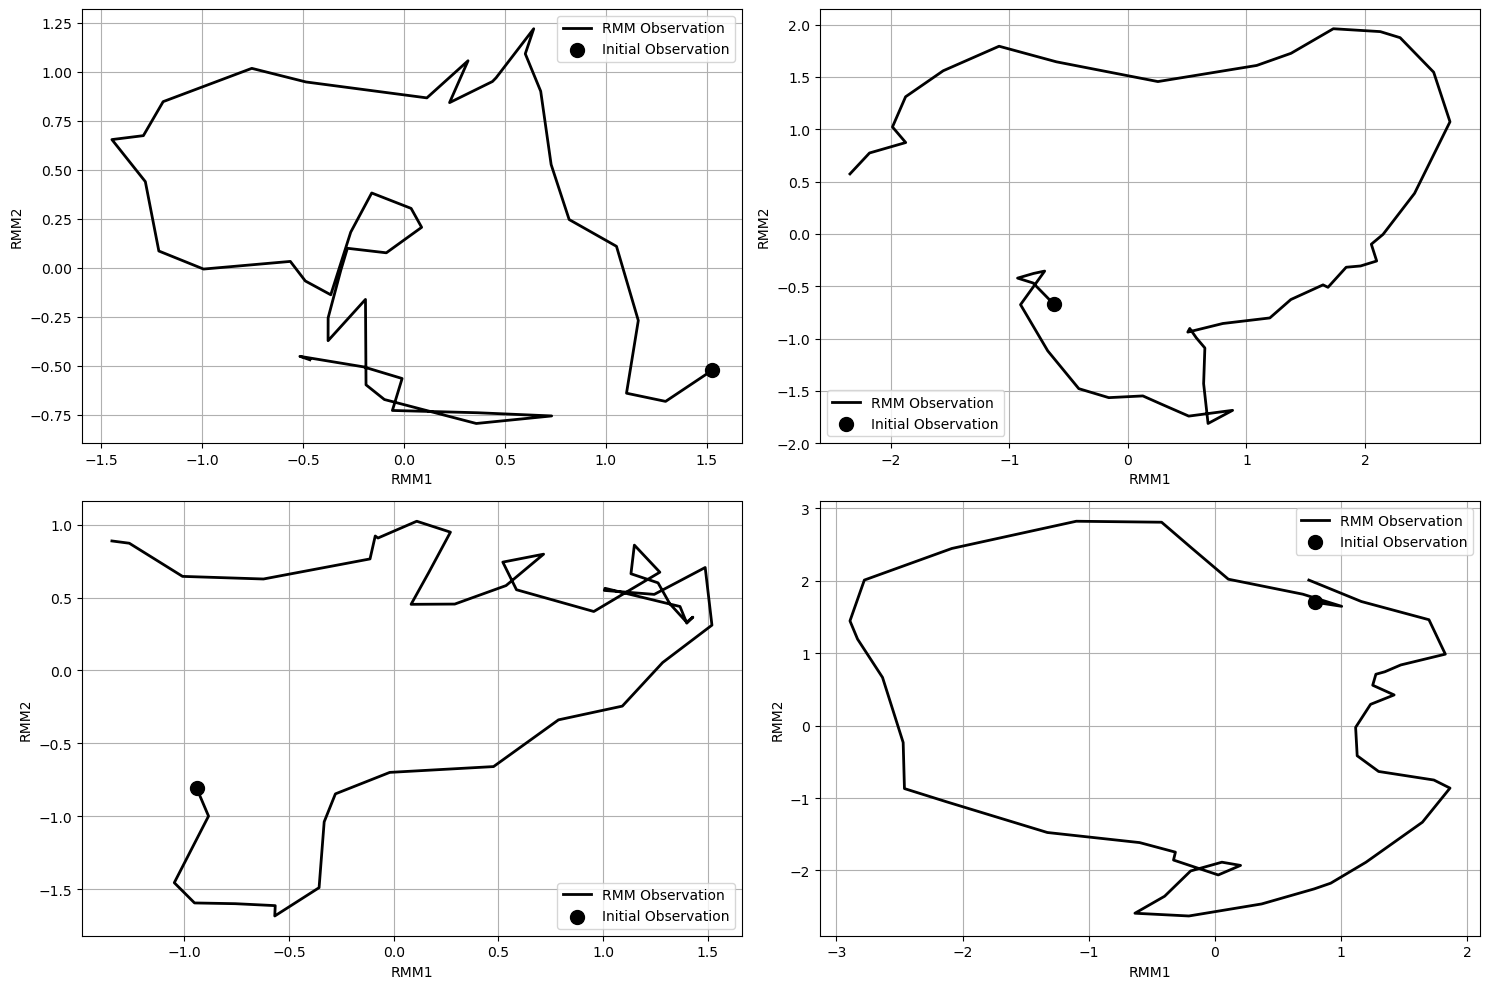

In [21]:
# Create a 2x2 grid of subplots with figure size (15, 10)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# --- Subplot 1: RMM1 vs RMM2 for date range in November 1, 2005 to December 16, 2005 ---
df_2005 = df[(df['date'] >= '2005-11-01') & 
             (df['date'] <= '2005-12-16')].reset_index(drop=True)
rmm1_2005, rmm2_2005 = df_2005['RMM1'], df_2005['RMM2']
axes[0, 0].plot(rmm1_2005, rmm2_2005, 
                color='black', linewidth=2, 
                label='RMM Observation')
axes[0, 0].scatter(rmm1_2005[0], rmm2_2005[0], 
                   color='black', s=100, 
                   label='Initial Observation', zorder=5)
axes[0, 0].set_xlabel('RMM1')
axes[0, 0].set_ylabel('RMM2')
axes[0, 0].grid(True)
axes[0, 0].legend()

# --- Subplot 2: RMM1 vs RMM2 for date range in September 1, 2006 to October 16, 2006 ---
df_2006 = df[(df['date'] >= '2006-09-01') & 
             (df['date'] <= '2006-10-16')].reset_index(drop=True)
rmm1_2006, rmm2_2006 = df_2006['RMM1'], df_2006['RMM2']
axes[0, 1].plot(rmm1_2006, rmm2_2006, 
                color='black', linewidth=2, 
                label='RMM Observation')
axes[0, 1].scatter(rmm1_2006[0], rmm2_2006[0], 
                   color='black', s=100, 
                   label='Initial Observation', zorder=5)
axes[0, 1].set_xlabel('RMM1')
axes[0, 1].set_ylabel('RMM2')
axes[0, 1].grid(True)
axes[0, 1].legend()

# --- Subplot 3: RMM1 vs RMM2 for date range in August 26, 2007 to October 10, 2007 ---
df_2007 = df[(df['date'] >= '2007-08-26') & 
             (df['date'] <= '2007-10-10')].reset_index(drop=True)
rmm1_2007, rmm2_2007 = df_2007['RMM1'], df_2007['RMM2']
axes[1, 0].plot(rmm1_2007, rmm2_2007, 
                color='black', linewidth=2, 
                label='RMM Observation')
axes[1, 0].scatter(rmm1_2007[0], rmm2_2007[0], 
                   color='black', s=100, 
                   label='Initial Observation', zorder=5)
axes[1, 0].set_xlabel('RMM1')
axes[1, 0].set_ylabel('RMM2')
axes[1, 0].grid(True)
axes[1, 0].legend()  # Add a legend

# --- Subplot 4: RMM1 vs RMM2 for date range in November 22, 2007 to January 6, 2008 ---
df_2008 = df[(df['date'] >= '2007-11-22') & 
             (df['date'] <= '2008-01-06')].reset_index(drop=True)
rmm1_2008, rmm2_2008 = df_2008['RMM1'], df_2008['RMM2']
axes[1, 1].plot(rmm1_2008, rmm2_2008, 
                color='black', linewidth=2, 
                label='RMM Observation')
axes[1, 1].scatter(rmm1_2008[0], rmm2_2008[0], 
                   color='black', s=100, 
                   label='Initial Observation', zorder=5)
axes[1, 1].set_xlabel('RMM1')
axes[1, 1].set_ylabel('RMM2')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout() # Adjust layout for better readability
plt.show()

# Question 3.

**Depending on which paper you select:**

## 3 (a.)

**If you follow the Data-Driven SDE paper, then write a code that uses the Euler-Maruyama method to find numerical solutions to Equations (2a)-(2d). Use the parameter values from the Figure 2 caption. Use your simulated data to make plots as in Problem 2.**

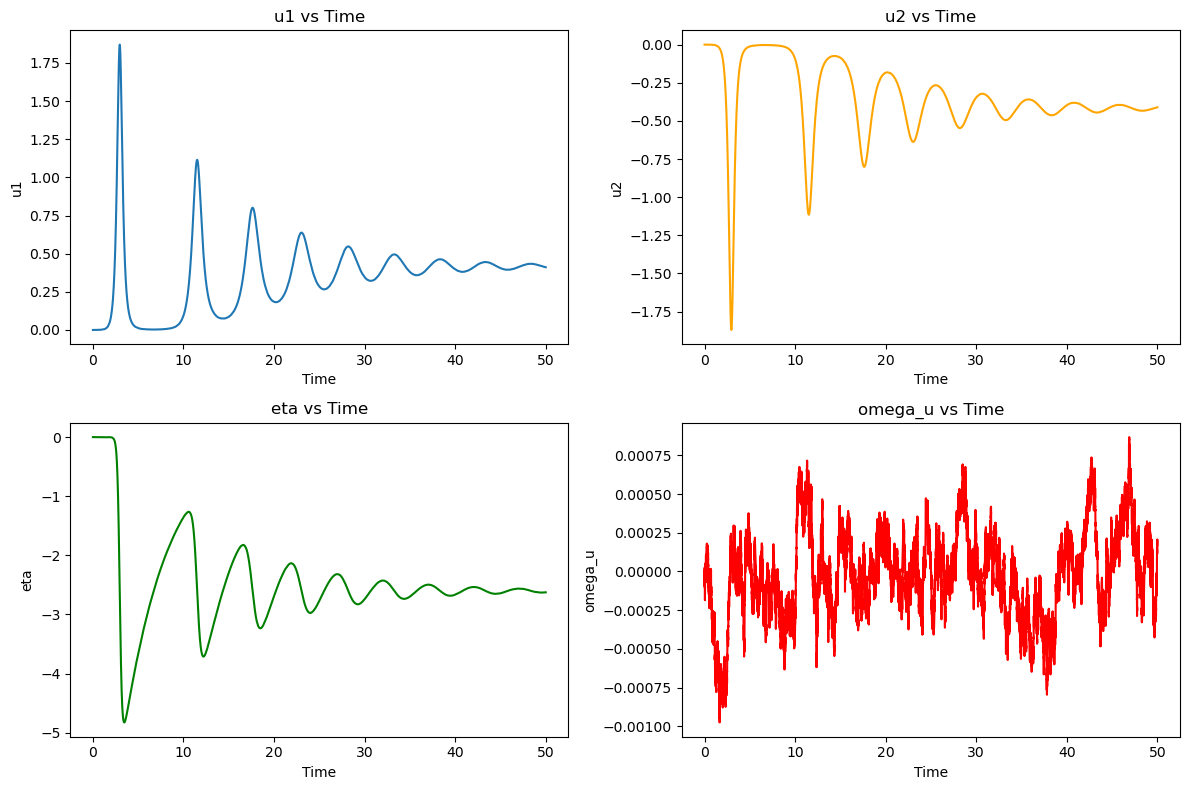

In [22]:
def du1_dt(d_u, gamma, eta, a, omega_u, sigma_u, W_u1, u1, u2):
    """
    Calculate the time derivative of u1 based on the given parameters.

    --- inputs ---
    - d_u (float): Damping coefficient for u1.
    - gamma (float): Coupling strength.
    - eta (float): Auxiliary variable affecting u1 and u2.
    - a (float): Constant parameter.
    - omega_u (float): Frequency parameter for u1 and u2.
    - sigma_u (float): Noise strength for u1.
    - W_u1 (float): Wiener process increment for u1.
    - u1 (float): Current value of u1.
    - u2 (float): Current value of u2.

    --- output ---
    - du1_dt (float): Time derivative of u1.
    """
    return (-d_u * u1 + gamma * eta * u1 - (a + omega_u) * u2) + sigma_u * W_u1

def du2_dt(d_u, gamma, eta, a, omega_u, sigma_u, W_u2, u1, u2):
    """
    Calculate the time derivative of u2 based on the given parameters.

    --- inputs ---
    - d_u (float): Damping coefficient for u2.
    - gamma (float): Coupling strength.
    - eta (float): Auxiliary variable affecting u1 and u2.
    - a (float): Constant parameter.
    - omega_u (float): Frequency parameter for u1 and u2.
    - sigma_u (float): Noise strength for u2.
    - W_u2 (float): Wiener process increment for u2.
    - u1 (float): Current value of u1.
    - u2 (float): Current value of u2.

    --- output ---
    - du2_dt (float): Time derivative of u2.
    """
    return (-d_u * u2 + gamma * eta * u2 - (a + omega_u) * u1) + sigma_u * W_u2

def deta_dt(d_eta, gamma, eta, sigma_eta, W_eta, u1, u2):
    """
    Calculate the time derivative of eta based on the given parameters.

    --- inputs ---
    - d_eta (float): Damping coefficient for eta.
    - gamma (float): Coupling strength.
    - eta (float): Current value of eta.
    - sigma_eta (float): Noise strength for eta.
    - W_eta (float): Wiener process increment for eta.
    - u1 (float): Current value of u1.
    - u2 (float): Current value of u2.

    --- output ---
    - deta_dt (float): Time derivative of eta.
    """
    return (-d_eta * eta - gamma * (u1**2 + u2**2)) + sigma_eta * W_eta

def domega_u_dt(d_omega, sigma_omega, W_omega, omega_u):
    """
    Calculate the time derivative of omega_u based on the given parameters.

    --- inputs ---
    - d_omega (float): Damping coefficient for omega_u.
    - sigma_omega (float): Noise strength for omega_u.
    - W_omega (float): Wiener process increment for omega_u.
    - omega_u (float): Current value of omega_u.

    --- output ---
    - domega_u_dt (float): Time derivative of omega_u.
    """
    return (-d_omega * omega_u) + sigma_omega * W_omega


# Initialize system parameters
a = 4
gamma = 1.5
sigma_u = 0.4
sigma_eta = 1
sigma_omega = 0.5
d_u = 0.1
d_eta = 0.2
d_omega = 1.2

# Simulation time parameters
T = 50                      # Total simulation time
dt = 0.001                  # Time step size
num_steps = int(T / dt)     # Total number of steps

# Initialize arrays to store the values of u1, u2, eta, and omega_u over time
u1 = np.zeros(num_steps)
u2 = np.zeros(num_steps)
eta_values = np.zeros(num_steps)
omega_u_values = np.zeros(num_steps)

# Set initial conditions
u1[0], u2[0], eta_values[0], omega_u_values[0] = 0.0, 0.0, 0.0, 0.0

# Euler-Maruyama integration loop for solving the stochastic differential equations
for i in range(1, num_steps):

    # Generate Wiener process increments (Gaussian random noise)
    W_u1 = np.random.normal(0, np.sqrt(dt))
    W_u2 = np.random.normal(0, np.sqrt(dt))
    W_eta = np.random.normal(0, np.sqrt(dt))
    W_omega = np.random.normal(0, np.sqrt(dt))

    # Update the values of u1, u2, eta, and omega_u using Euler-Maruyama scheme
    u1[i] = u1[i-1] + du1_dt(d_u, gamma, eta_values[i-1], a, omega_u_values[i-1], sigma_u, W_u1, u1[i-1], u2[i-1]) * dt
    u2[i] = u2[i-1] + du2_dt(d_u, gamma, eta_values[i-1], a, omega_u_values[i-1], sigma_u, W_u2, u1[i-1], u2[i-1]) * dt
    eta_values[i] = eta_values[i-1] + deta_dt(d_eta, gamma, eta_values[i-1], sigma_eta, W_eta, u1[i-1], u2[i-1]) * dt
    omega_u_values[i] = omega_u_values[i-1] + domega_u_dt(d_omega, sigma_omega, W_omega, omega_u_values[i-1]) * dt

# Plot results for u1, u2, eta, and omega_u over time
time = np.linspace(0, T, num_steps)  # Generate time points

plt.figure(figsize=(12, 8))

# Plot u1 vs Time
plt.subplot(2, 2, 1)
plt.plot(time, u1, label="u1")
plt.xlabel("Time")
plt.ylabel("u1")
plt.title("u1 vs Time")

# Plot u2 vs Time
plt.subplot(2, 2, 2)
plt.plot(time, u2, label="u2", color='orange')
plt.xlabel("Time")
plt.ylabel("u2")
plt.title("u2 vs Time")

# Plot eta vs Time
plt.subplot(2, 2, 3)
plt.plot(time, eta_values, label="eta", color='green')
plt.xlabel("Time")
plt.ylabel("eta")
plt.title("eta vs Time")

# Plot omega_u vs Time
plt.subplot(2, 2, 4)
plt.plot(time, omega_u_values, label="omega_u", color='red')
plt.xlabel("Time")
plt.ylabel("omega_u")
plt.title("omega_u vs Time")

plt.tight_layout()  # Adjust layout for better readability
plt.show()


## 3 (b.)

**If you follow the SSA-CP paper, then write a code to calculate the traditional SSA, following equations (1)-(5). Apply your code to the RMM index data. Make plots as in Problem 2, and make a separate plot for each of the first 4 SSA modes.**

In [24]:
class Traditional_SSA():
    """
    A class that implements the Traditional Singular Spectrum Analysis (SSA) for time series analysis.
    
    --- attributes ---
    - arr (np.ndarray): The input time series as a numpy array.
    - M (int): The embedding window size.
    - N (int): The length of the time series.
    - X (np.ndarray): The time-lagged embedding matrix.
    - eigenvalues (np.ndarray): The eigenvalues of the covariance matrix.
    - eigenvectors (np.ndarray): The eigenvectors of the covariance matrix.
    - mode (int): The mode to use for reconstruction.
    """

    def __init__(self, arr, embedding_window, mode):
        """
        Initialize the SSA object with the time series, embedding window, and mode.
        
        --- inputs ---
        - arr (array-like): The input time series.
        - embedding_window (int): The window size used for time-lagged embedding.
        - mode (int): The mode for reconstruction based on eigenvalue and eigenvector decomposition.
        """

        # Convert input to a numpy array if not already
        if not isinstance(arr, np.ndarray):
            self.arr = np.array(arr)
        else:
            self.arr = arr

        # Set embedding window and validate size
        self.M = embedding_window
        if self.M > len(self.arr):
            raise ValueError(f"Embedding window {embedding_window} cannot be larger than the length of the time series {len(self.arr)}.")
        
        # Create time-lagged embedding matrix and get matrix dimensions
        self.N, self.X = self.time_lagged_embedding()

        # Compute eigenvalues and eigenvectors of the covariance matrix
        self.eigenvalues, self.eigenvectors = self.get_eigenvalue_eigenvector()

        # Sort eigenvalues and eigenvectors in descending order of eigenvalues
        idx = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]

        # Validate the mode input
        if not isinstance(mode, int):
            raise TypeError(f"mode {mode} should be of type python int.")
        elif mode >= len(self.eigenvalues):
            raise ValueError(f"mode {mode} is out of bounds for the number of eigenvectors ({len(self.eigenvalues)}).")
        elif mode < 0:
            raise ValueError(f"mode {mode} should be non-negative.")
        else:
            self.mode = mode

    def time_lagged_embedding(self):
        """
        Create a time-lagged embedding matrix from the input time series.
        
        --- outputs ---
        - N (int): The length of the time series.
        - embedding_matrix (np.ndarray): The time-lagged embedding matrix of size M x (N - M + 1).
        """
        N = len(self.arr)
        embedding_matrix = np.zeros((self.M, N - self.M + 1))  # Create the embedding matrix

        # Fill the embedding matrix with time-lagged vectors
        for i in range(self.M):
            embedding_matrix[i] = self.arr[i:N - self.M + 1 + i]

        return N, embedding_matrix

    def covariance_matrix(self):
        """
        Compute the covariance matrix of the time-lagged embedding matrix.
        
        --- outputs ---
        - covariance_matrix (np.ndarray): The covariance matrix of the embedding matrix X.
        """
        return np.matmul(self.X, self.X.T) / (self.N - self.M + 1)

    def get_eigenvalue_eigenvector(self):
        """
        Compute the eigenvalues and eigenvectors of the covariance matrix.
        
        --- outputs ---
        - eigenvalues (np.ndarray): Eigenvalues of the covariance matrix.
        - eigenvectors (np.ndarray): Eigenvectors of the covariance matrix.
        """
        return np.linalg.eigh(self.covariance_matrix())  # Compute eigenvalues and eigenvectors

    def get_PC(self):
        """
        Compute the principal components (PCs) by projecting the embedding matrix onto the eigenvectors.
        
        --- outputs ---
        - PCs (np.ndarray): Principal components of the input time series.
        """
        return np.matmul(self.X.T, self.eigenvectors)  # Project onto eigenvectors to get principal components

    def reconstruct_component(self):
        """
        Reconstruct the time series for the specified mode based on the eigenvector decomposition.
        
        --- outputs ---
        - reconstructed_series (np.ndarray): The reconstructed time series component for the specified mode.
        """
        z_t = np.zeros(self.N)  # Initialize the reconstructed series
        v_i = self.eigenvectors[:, self.mode]  # Eigenvector for the specified mode

        # Loop over the time steps to perform reconstruction
        for t in range(1, self.N + 1):
            # Determine the window size M_t, L_t, and U_t based on the current time index t
            if 1 <= t <= self.M - 1:
                M_t, L_t, U_t = t, 1, t
            elif self.M <= t <= self.N - self.M + 1:
                M_t, L_t, U_t = self.M, 1, self.M
            else:
                M_t, L_t, U_t = self.N - t + 1, t - self.N + self.M, self.M

            # Ensure the time index for the embedding matrix is within bounds
            if t - L_t >= self.X.shape[1]:
                continue

            # Reconstruct the value at time t using the specified mode
            z_t[t-1] = np.sum(v_i[L_t-1:U_t] * self.X[L_t-1:U_t, t-L_t]) / M_t

        return z_t  # Return the reconstructed time series component

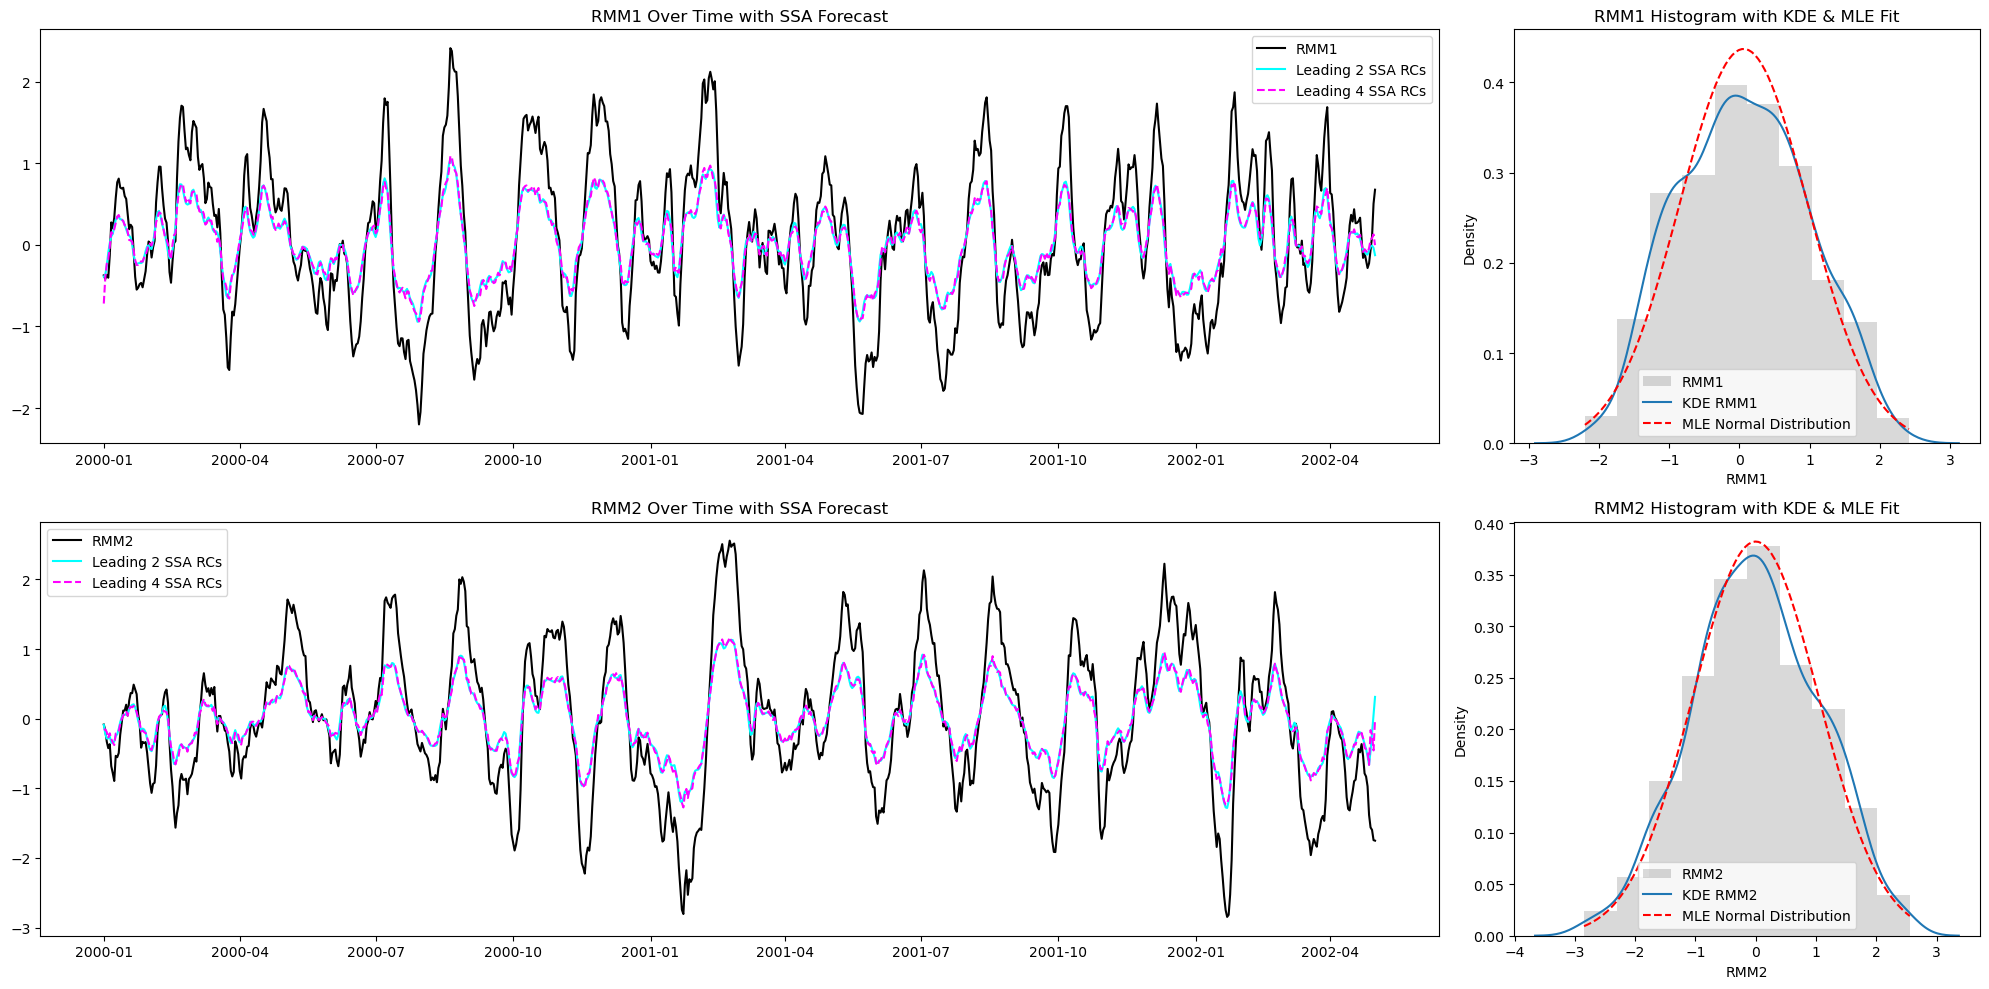

In [27]:
def ssa_reconstruct(arr, embedding_window, num_components):
    """
    Perform SSA decomposition and reconstruct the time series using the specified number of components.
    
    --- inputs ---
    - arr (np.ndarray): The input time series to decompose.
    - embedding_window (int): The window size for SSA embedding.
    - num_components (int): The number of SSA components to use for reconstruction.
    
    --- outputs ---
    - reconstructed (np.ndarray): The time series reconstructed using the leading 'num_components' SSA components.
    """
    ssa = Traditional_SSA(arr=arr, embedding_window=embedding_window, mode=0)
    reconstructed = np.zeros_like(arr)  # Initialize an array to store the reconstructed series
    
    # Reconstruct using the first 'num_components' SSA modes
    for mode in range(num_components):
        ssa = Traditional_SSA(arr=arr, embedding_window=embedding_window, mode=mode)
        reconstructed += ssa.reconstruct_component()
    
    return -reconstructed

# Parameters for SSA
embedding_window = 5  # Embedding window size for SSA

# Extract RMM1 from df_2000 and reconstruct it using 2 and 4 components
rmm1_2000 = np.asanyarray(df_2000['RMM1'])
rmm1_rc2 = ssa_reconstruct(rmm1_2000, embedding_window, num_components=2)  # Reconstruct with 2 components
rmm1_rc4 = ssa_reconstruct(rmm1_2000, embedding_window, num_components=4)  # Reconstruct with 4 components

# Extract RMM2 from df_2000 and reconstruct it using 2 and 4 components
rmm2_2000 = np.asanyarray(df_2000['RMM2'])
rmm2_rc2 = ssa_reconstruct(rmm2_2000, embedding_window, num_components=2)  # Reconstruct with 2 components
rmm2_rc4 = ssa_reconstruct(rmm2_2000, embedding_window, num_components=4)  # Reconstruct with 4 components

# Create a figure with a 2x2 grid of subplots
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1])

# Subplot 1: RMM1 over time with SSA reconstructions
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_2000['date'], rmm1_2000, color='black', label='RMM1')
ax1.plot(df_2000['date'], rmm1_rc2, color='cyan', label='Leading 2 SSA RCs', linestyle='-')
ax1.plot(df_2000['date'], rmm1_rc4, color='magenta', label='Leading 4 SSA RCs', linestyle='--')
ax1.set_title('RMM1 Over Time with SSA Forecast')
ax1.legend()  # Add a legend for the plot

# Subplot 2: Histogram and distribution for RMM1
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(rmm1_2000, density=True, alpha=0.15, color='black', label='RMM1')  # Histogram for RMM1
sns.kdeplot(data=df_2000, x='RMM1', ax=ax2, fill=False, label='KDE RMM1')  # Kernel Density Estimate

# Fit a normal distribution and plot it on top of the histogram
rmm1_mean, rmm1_std = np.mean(rmm1_2000), np.std(rmm1_2000)
x_rmm1 = np.linspace(min(rmm1_2000), max(rmm1_2000), 100)
pdf_rmm1 = norm.pdf(x_rmm1, rmm1_mean, rmm1_std)
ax2.plot(x_rmm1, pdf_rmm1, 'r--', label='MLE Normal Distribution')  # Plot the normal distribution
ax2.set_title('RMM1 Histogram with KDE & MLE Fit')
ax2.legend()

# Subplot 3: RMM2 over time with SSA reconstructions
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(df_2000['date'], rmm2_2000, color='black', label='RMM2')
ax3.plot(df_2000['date'], rmm2_rc2, color='cyan', label='Leading 2 SSA RCs', linestyle='-')
ax3.plot(df_2000['date'], rmm2_rc4, color='magenta', label='Leading 4 SSA RCs', linestyle='--')
ax3.set_title('RMM2 Over Time with SSA Forecast')
ax3.legend()  # Add a legend for the plot

# Subplot 4: Histogram and distribution for RMM2
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(rmm2_2000, density=True, alpha=0.15, color='black', label='RMM2')  # Histogram for RMM2
sns.kdeplot(data=df_2000, x='RMM2', ax=ax4, fill=False, label='KDE RMM2')  # Kernel Density Estimate

# Fit a normal distribution and plot it on top of the histogram
rmm2_mean, rmm2_std = np.mean(rmm2_2000), np.std(rmm2_2000)
x_rmm2 = np.linspace(min(rmm2_2000), max(rmm2_2000), 100)
pdf_rmm2 = norm.pdf(x_rmm2, rmm2_mean, rmm2_std)
ax4.plot(x_rmm2, pdf_rmm2, 'r--', label='MLE Normal Distribution')  # Plot the normal distribution
ax4.set_title('RMM2 Histogram with KDE & MLE Fit')
ax4.legend()

plt.tight_layout() # Adjust layout for better readability
plt.show()

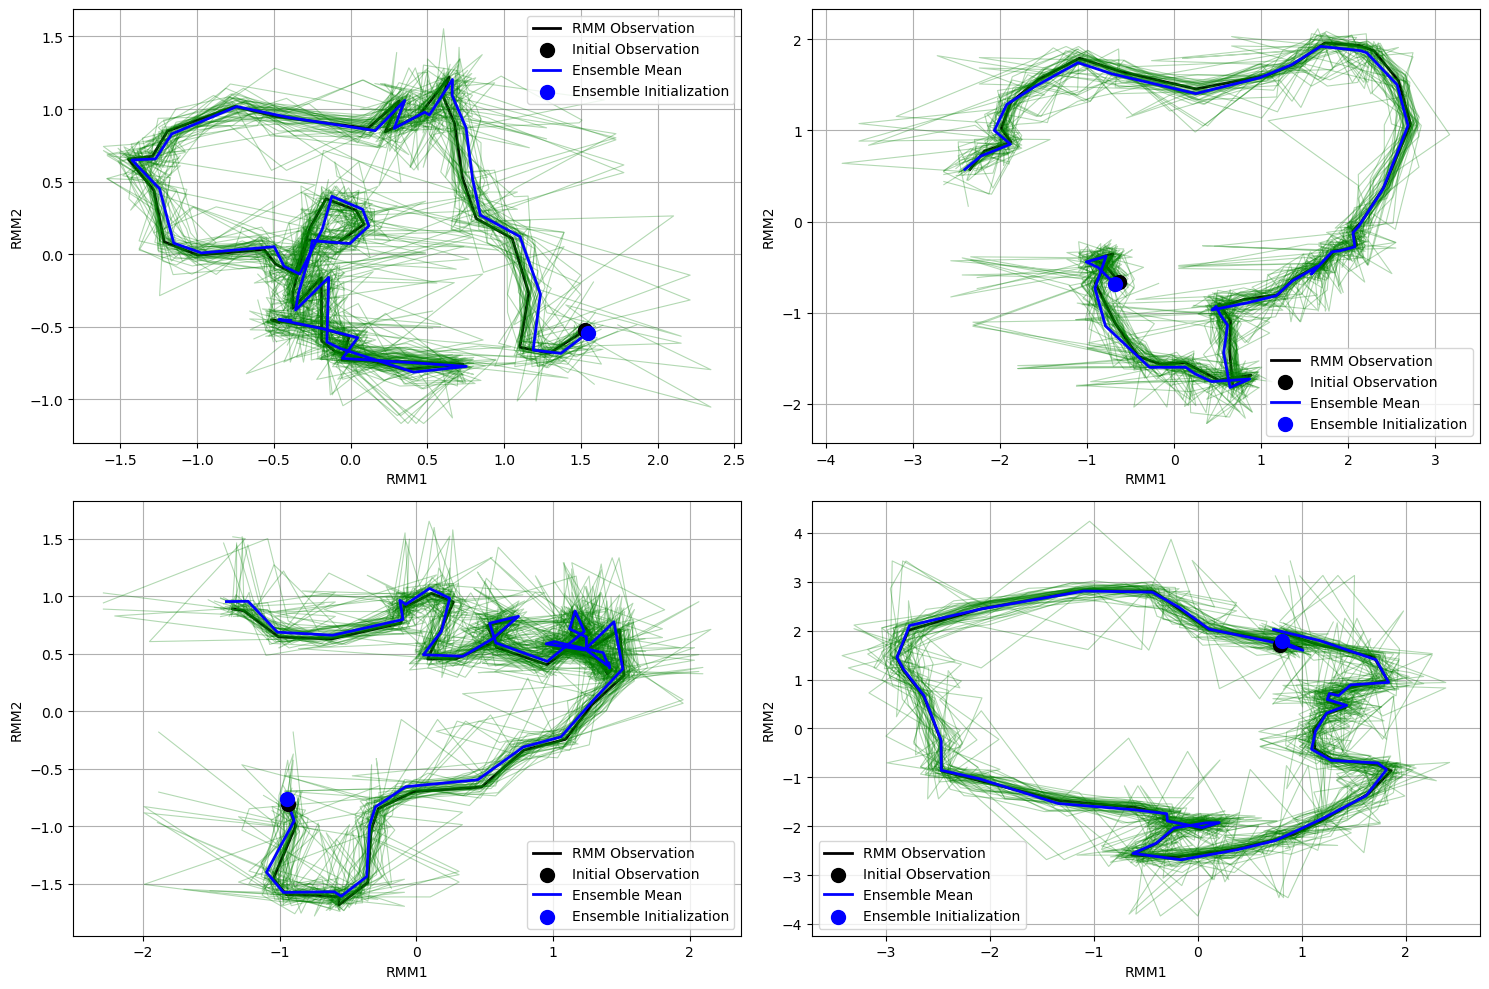

In [26]:
def generate_ensemble_with_mean(traditional_ssa, num_ensembles=50):
    """
    Generate ensemble predictions using SSA-based resampling and compute the ensemble mean.
    
    --- inputs ---
    - traditional_ssa (Traditional_SSA object): An instance of the SSA model for a given time series.
    - num_ensembles (int): The number of ensemble members to generate (default is 50).
    
    --- outputs ---
    - ensembles (np.ndarray): An array of generated ensemble time series.
    - ensemble_mean (np.ndarray): The mean of the generated ensemble time series.
    """
    ensembles = []
    
    # Generate ensemble members by adding bootstrapped noise to the original time series
    for _ in range(num_ensembles):
        # Resample the noise component using bootstrap
        noise = np.random.choice(traditional_ssa.reconstruct_component(), size=len(traditional_ssa.arr), replace=True)
        # Create an ensemble member by adding the resampled noise to the original series
        ensemble_member = traditional_ssa.arr + noise
        ensembles.append(ensemble_member)
    
    ensembles = np.array(ensembles)  # Convert to numpy array
    ensemble_mean = np.mean(ensembles, axis=0)  # Compute the mean of the ensemble members
    return ensembles, ensemble_mean

# Set parameters
ensemble_size = 50  # Number of ensemble members
embedding_window = 2  # SSA embedding window size

# Define date ranges for which SSA-based predictions will be generated
date_ranges = [
    ('2005-11-01', '2005-12-16'),
    ('2006-09-01', '2006-10-16'),
    ('2007-08-26', '2007-10-10'),
    ('2007-11-22', '2008-01-06')
]

# Create a 2x2 grid of subplots for visualizing the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loop over each date range to generate SSA-based ensemble predictions
for idx, (start_date, end_date) in enumerate(date_ranges):
    # Filter the data for the specific date range
    df_subset = df[(df['date'] >= start_date) & (df['date'] <= end_date)].reset_index(drop=True)
    rmm1, rmm2 = df_subset['RMM1'], df_subset['RMM2']
    
    # Initialize SSA for each time series (RMM1 and RMM2)
    ssa_rmm1 = Traditional_SSA(rmm1.values, embedding_window, mode=1)  # SSA for RMM1
    ssa_rmm2 = Traditional_SSA(rmm2.values, embedding_window, mode=1)  # SSA for RMM2
    
    # Generate ensemble predictions and compute the ensemble mean for both RMM1 and RMM2
    ensemble_rmm1, ensemble_mean_rmm1 = generate_ensemble_with_mean(ssa_rmm1, ensemble_size)
    ensemble_rmm2, ensemble_mean_rmm2 = generate_ensemble_with_mean(ssa_rmm2, ensemble_size)
    
    # Select the subplot for the current date range
    ax = axes[idx // 2, idx % 2]
    
    # Plot the original RMM trajectory (thick black line)
    ax.plot(rmm1, rmm2, color='black', linewidth=2, label='RMM Observation')
    # Highlight the initial observation with a large black scatter point
    ax.scatter(rmm1[0], rmm2[0], color='black', s=100, label='Initial Observation', zorder=5)

    # Plot the ensemble trajectories (thin green lines)
    for i in range(ensemble_size):
        ax.plot(ensemble_rmm1[i], 
                ensemble_rmm2[i], 
                color='green', 
                alpha=0.3,  # Set transparency for better visualization
                linewidth=0.8)  # Thin lines for individual ensemble members

    # Plot the ensemble mean trajectory (thick blue line)
    ax.plot(ensemble_mean_rmm1, ensemble_mean_rmm2, 
            color='blue', 
            linewidth=2, 
            label='Ensemble Mean')
    # Highlight the ensemble initialization with a large blue scatter point
    ax.scatter(ensemble_mean_rmm1[0], ensemble_mean_rmm2[0], 
               color='blue', 
               s=100, 
               label='Ensemble Initialization', 
               zorder=5)
    
    # Set labels and grid for the subplot
    ax.set_xlabel('RMM1')
    ax.set_ylabel('RMM2')
    ax.grid(True)
    ax.legend()

plt.tight_layout() # Adjust layout for better readability
plt.show()